Inna licznosc zbioru

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.metrics import pi_kf

In [2]:
data = pd.read_csv("/home/krystian/Downloads/archive/thyroidDF.csv")

In [3]:
data.shape

(9172, 31)

In [4]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [5]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [6]:
data["target"].value_counts()

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

In [7]:
# 	hypothyroid conditions:

# 		E	hypothyroid
# 		F	primary hypothyroid
# 		G	compensated hypothyroid
# 		H	secondary hypothyroid

In [8]:
data["age"].isna().sum(), data["TSH"].isna().sum(), data["T3"].isna().sum(), data["TT4"].isna().sum(), data["T4U"].isna().sum(), data["FTI"].isna().sum(), data["TBG"].isna().sum()

(0, 842, 2604, 442, 809, 802, 8823)

In [9]:
data = data[(data["age"] > 0) & (data["age"] < 101)]
data = data[data["target"].isin(["-", "G", "F"])]
data.loc[data["target"]=="-", "target"] = 0
data.loc[data["target"]=="G", "target"] = 1
data.loc[data["target"]=="F", "target"] = 2
data["target"] = data["target"].astype(int)
data = data.reset_index(drop=True)

data.shape

(7359, 31)

In [10]:
data["age"].isna().sum(), data["TSH"].isna().sum(), data["T3"].isna().sum(), data["TT4"].isna().sum(), data["T4U"].isna().sum(), data["FTI"].isna().sum(), data["TBG"].isna().sum()

(0, 689, 2172, 354, 670, 663, 7103)

In [12]:
data.loc[data["target"]==0, "TSH"] = data.loc[data["target"]==0, "TSH"].fillna(data.loc[data["target"]==0, "TSH"].median())
data.loc[data["target"]==1, "TSH"] = data.loc[data["target"]==1, "TSH"].fillna(data.loc[data["target"]==1, "TSH"].median())
data.loc[data["target"]==2, "TSH"] = data.loc[data["target"]==2, "TSH"].fillna(data.loc[data["target"]==2, "TSH"].median())

data.loc[data["target"]==0, "T3"] = data.loc[data["target"]==0, "T3"].fillna(data.loc[data["target"]==0, "T3"].mean())
data.loc[data["target"]==1, "T3"] = data.loc[data["target"]==1, "T3"].fillna(data.loc[data["target"]==1, "T3"].mean())
data.loc[data["target"]==2, "T3"] = data.loc[data["target"]==2, "T3"].fillna(data.loc[data["target"]==2, "T3"].mean())

data.loc[data["target"]==0, "TT4"] = data.loc[data["target"]==0, "TT4"].fillna(data.loc[data["target"]==0, "TT4"].mean())
data.loc[data["target"]==1, "TT4"] = data.loc[data["target"]==1, "TT4"].fillna(data.loc[data["target"]==1, "TT4"].mean())
data.loc[data["target"]==2, "TT4"] = data.loc[data["target"]==2, "TT4"].fillna(data.loc[data["target"]==2, "TT4"].mean())

data.loc[data["target"]==0, "T4U"] = data.loc[data["target"]==0, "T4U"].fillna(data.loc[data["target"]==0, "T4U"].mean())
data.loc[data["target"]==1, "T4U"] = data.loc[data["target"]==1, "T4U"].fillna(data.loc[data["target"]==1, "T4U"].mean())
data.loc[data["target"]==2, "T4U"] = data.loc[data["target"]==2, "T4U"].fillna(data.loc[data["target"]==2, "T4U"].mean())

data.loc[data["target"]==0, "FTI"] = data.loc[data["target"]==0, "FTI"].fillna(data.loc[data["target"]==0, "FTI"].mean())
data.loc[data["target"]==1, "FTI"] = data.loc[data["target"]==1, "FTI"].fillna(data.loc[data["target"]==1, "FTI"].mean())
data.loc[data["target"]==2, "FTI"] = data.loc[data["target"]==2, "FTI"].fillna(data.loc[data["target"]==2, "FTI"].mean())

In [13]:
# data = data[["age", "TSH", "T3", "TT4", "T4U", "FTI", "target"]].dropna()

In [14]:
data.shape

(7359, 31)

In [15]:
data["target"].value_counts()

0    6767
1     359
2     233
Name: target, dtype: int64

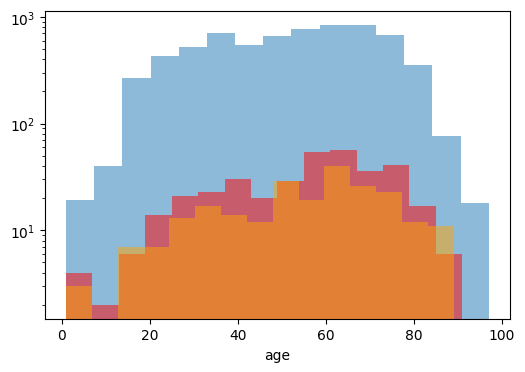

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["target"] == 0, "age"], bins=15, alpha=0.5)
plt.hist(data.loc[data["target"] == 1, "age"], bins=15, alpha=0.5, color="red")
plt.hist(data.loc[data["target"] == 2, "age"], bins=15, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("age")
plt.show()

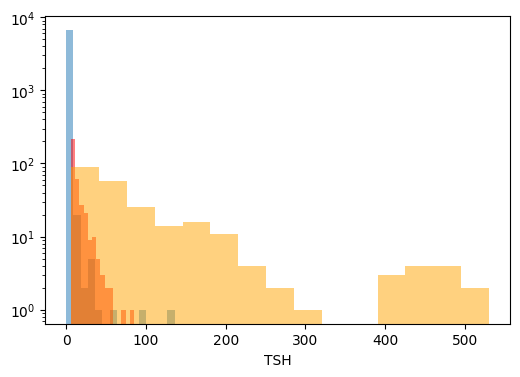

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["target"] == 0, "TSH"], bins=15, alpha=0.5)
plt.hist(data.loc[data["target"] == 1, "TSH"], bins=15, alpha=0.5, color="red")
plt.hist(data.loc[data["target"] == 2, "TSH"], bins=15, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("TSH")
plt.show()

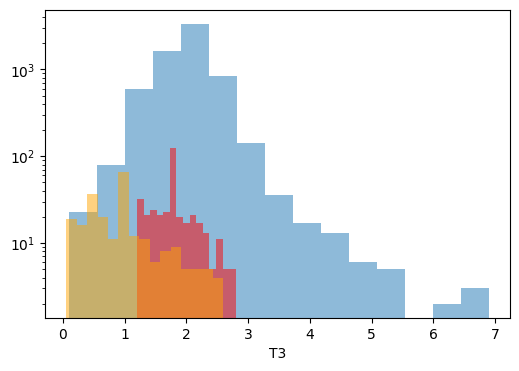

In [18]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["target"] == 0, "T3"], bins=15, alpha=0.5)
plt.hist(data.loc[data["target"] == 1, "T3"], bins=15, alpha=0.5, color="red")
plt.hist(data.loc[data["target"] == 2, "T3"], bins=15, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("T3")
plt.show()

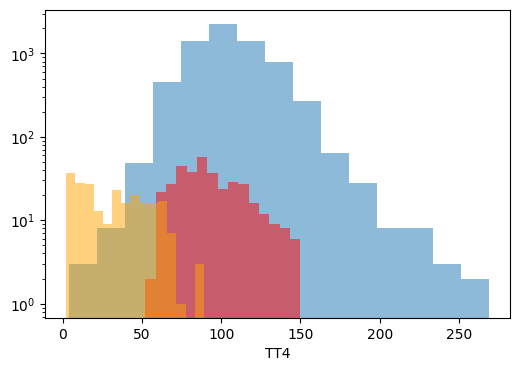

In [19]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["target"] == 0, "TT4"], bins=15, alpha=0.5)
plt.hist(data.loc[data["target"] == 1, "TT4"], bins=15, alpha=0.5, color="red")
plt.hist(data.loc[data["target"] == 2, "TT4"], bins=15, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("TT4")
plt.show()

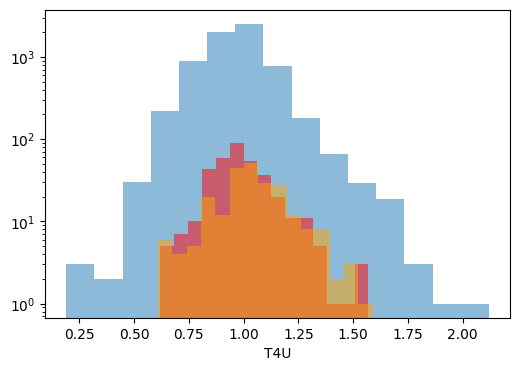

In [20]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["target"] == 0, "T4U"], bins=15, alpha=0.5)
plt.hist(data.loc[data["target"] == 1, "T4U"], bins=15, alpha=0.5, color="red")
plt.hist(data.loc[data["target"] == 2, "T4U"], bins=15, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("T4U")
plt.show()

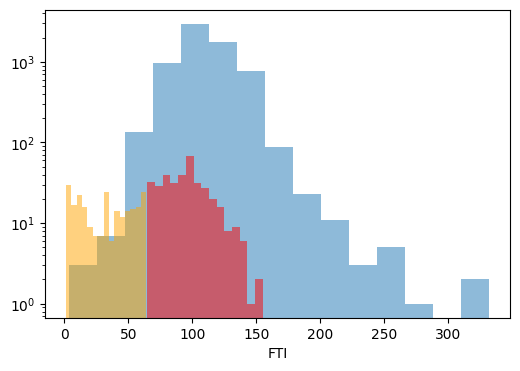

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(data.loc[data["target"] == 0, "FTI"], bins=15, alpha=0.5)
plt.hist(data.loc[data["target"] == 1, "FTI"], bins=15, alpha=0.5, color="red")
plt.hist(data.loc[data["target"] == 2, "FTI"], bins=15, alpha=0.5, color="orange")
plt.yscale("log")
plt.xlabel("FTI")
plt.show()

# Outliers detection

In [22]:
data["target"].value_counts()

0    6767
1     359
2     233
Name: target, dtype: int64

In [23]:
data_all = data[["age", "TSH", "T3", "TT4", "T4U", "FTI", "target"]].copy()
data_all.loc[data_all["target"]!=0, "target"] = 1

x_train = data_all[["age", "TSH", "T3", "TT4", "T4U", "FTI"]].to_numpy().copy()
labels_train = data_all["target"].to_numpy().copy()

In [24]:
labels_train.sum() / labels_train.shape[0]

0.08044571273270824

In [25]:
outliers_detector = KDEOutliersDetection().fit(x_train, r=0.08)
labels_pred = outliers_detector.predict(x_train)

bandwidth = outliers_detector.kde.bandwidth
scores = outliers_detector.kde.pdf(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.1), np.quantile(scores, 0.2)

871 592
0.9999999997698863
[[6305  462]
 [ 183  409]]
precision: 0.4695752009184845
recall: 0.6908783783783784
accuracy: 0.9123522217692621


(0.0005175568507791623,
 0.0005175568507791623,
 0.0005175568507791623,
 0.0005175568508283778)

In [26]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*0.5, r=0.08)
labels_pred = outliers_detector.predict(x_train)
scores = outliers_detector.kde.pdf(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth*0.5)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.1), np.quantile(scores, 0.2)

3352 592
0.999847190238533
[[3981 2786]
 [  26  566]]
precision: 0.16885441527446302
recall: 0.956081081081081
accuracy: 0.6178828645196358


(0.033123638449866384,
 0.033123638449866384,
 0.033123638449866384,
 0.033123638449866384)

In [27]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*2, r=0.08)
labels_pred = outliers_detector.predict(x_train)
scores = outliers_detector.kde.pdf(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth*2)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.1), np.quantile(scores, 0.2)

589 592
0.9996766522497701
[[6510  257]
 [ 260  332]]
precision: 0.5636672325976231
recall: 0.5608108108108109
accuracy: 0.929745889387145


(8.08682579342441e-06,
 8.086825795521953e-06,
 8.086990962962372e-06,
 8.127641053203375e-06)

In [28]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*5, r=0.08)
labels_pred = outliers_detector.predict(x_train)
scores = outliers_detector.kde.pdf(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth*5)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.1), np.quantile(scores, 0.2)

589 592
0.5384019552530712
[[6510  257]
 [ 260  332]]
precision: 0.5636672325976231
recall: 0.5608108108108109
accuracy: 0.929745889387145


(3.3123701172232027e-08,
 3.4878160769702414e-08,
 5.134491713114199e-08,
 1.3663155249774445e-07)

In [29]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*10, r=0.08)
labels_pred = outliers_detector.predict(x_train)
scores = outliers_detector.kde.pdf(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth*10)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.1), np.quantile(scores, 0.2)

589 592
0.11294604615169347
[[6502  265]
 [ 268  324]]
precision: 0.5500848896434635
recall: 0.5472972972972973
accuracy: 0.9275716809349096


(5.50777291179766e-10,
 1.6360719035609508e-09,
 9.99587950781627e-09,
 3.760743640929293e-08)

In [30]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*20, r=0.08)
labels_pred = outliers_detector.predict(x_train)
scores = outliers_detector.kde.pdf(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth*20)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.1), np.quantile(scores, 0.2)

589 592
0.13040637661093296
[[6467  300]
 [ 303  289]]
precision: 0.4906621392190153
recall: 0.48817567567567566
accuracy: 0.9180595189563799


(2.390825448497554e-11,
 4.2306085712455836e-10,
 2.9196276266419575e-09,
 6.9752047580699115e-09)

In [31]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth*50, r=0.08)
labels_pred = outliers_detector.predict(x_train)
scores = outliers_detector.kde.pdf(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth*50)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

np.quantile(scores, 0.01), np.quantile(scores, 0.05), np.quantile(scores, 0.1), np.quantile(scores, 0.2)

589 592
0.38505109947720034
[[6448  319]
 [ 322  270]]
precision: 0.45840407470288624
recall: 0.4560810810810811
accuracy: 0.912895773882321


(7.793225024968781e-13,
 6.766955881599698e-11,
 1.1608669257504937e-10,
 1.4505653054400354e-10)

In [32]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.01)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

871 592
0.9999999997698863
[[6305  462]
 [ 183  409]]
precision: 0.4695752009184845
recall: 0.6908783783783784
accuracy: 0.9123522217692621


In [33]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.1)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

871 592
0.9999999997698863
[[6305  462]
 [ 183  409]]
precision: 0.4695752009184845
recall: 0.6908783783783784
accuracy: 0.9123522217692621


In [34]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.15)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

1104 592
0.9999999816992781
[[6126  641]
 [ 129  463]]
precision: 0.41938405797101447
recall: 0.7820945945945946
accuracy: 0.8953662182361734


In [35]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.2)
labels_pred = outliers_detector.predict(x_train)

print(labels_pred.sum(), labels_train.sum())

metric = pi_kf(x_train, labels_pred, bandwidth=bandwidth)
print(metric)

res = confusion_matrix(labels_train, labels_pred)
print(res)

print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

1472 592
0.9999975526255425
[[5792  975]
 [  95  497]]
precision: 0.3376358695652174
recall: 0.839527027027027
accuracy: 0.8545998097567604
